# Práctica 3 Diseño de filtros Butterworth digitales 

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy.signal      as sg 
import os 
import sounddevice       as sd

In [2]:
""""Función para estimación de FFT en dB"""

def fou(senal,sr):
    """senal: señal a la que desea obtener la transformada de Fourier
    sr: Frecuencia de muestreo de la señal"""
    f = np.fft.fft(senal)
    h = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w = np.linspace(0,sr/2,int(f.shape[0]/2))
    
    return h, w

In [3]:
"""Función para obtener la caracterización de filtros digitales"""

def freqz_plot(b,a,sr):
    """ba: coeficientes del diseño del filtro
    sr: Frecuencia de muestreo"""
    w,h     = sg.freqz(b,a)
    h[h==0] = 1E-5
    H       = 20*np.log10(np.abs(h))
    W       = np.angle(h)
    W       = np.unwrap(W)
    W       = np.degrees(W)
    w       = np.linspace(0,sr/2,H.shape[0])
    
    return w,W,H

In [4]:
datapath = 'C:\\Users\\HP desktop\\Documents\\Trimestre 19I\\Servicio social\\' #Ruta donde se encuentra la señal PCG_60.npz

In [5]:
#Cargar archivo npz de señal de fonocardiograma contaminado

PCG = np.load(datapath+'data\\PCG_60.npz')

for i in PCG.keys(): #Observar las variables que se encuentran en el archivo npz
    print (i)

PCG
sr


In [6]:
# Asignación de variables que se encuentran en los archivos npz

sr  = PCG['sr']
PCG = PCG['PCG']

In [7]:
#REproducción de audio de fonocardiograma contaminado 
sd.play(PCG,sr)

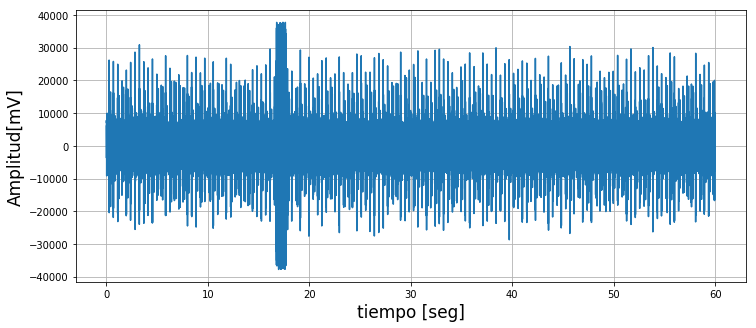

In [20]:
# Grafica de la señal 

t = np.linspace(0,PCG.shape[0]/sr,PCG.shape[0]) # Eje de tiempo

plt.figure(figsize=(12,5))
plt.plot(t,PCG) 
# plt.title('Señal original de PCG',fontsize=17)
plt.xlabel('tiempo [seg]',fontsize=17)
plt.ylabel('Amplitud[mV]',fontsize=17)
plt.grid(True)
plt.savefig(datapath+'images\\PCG.png')

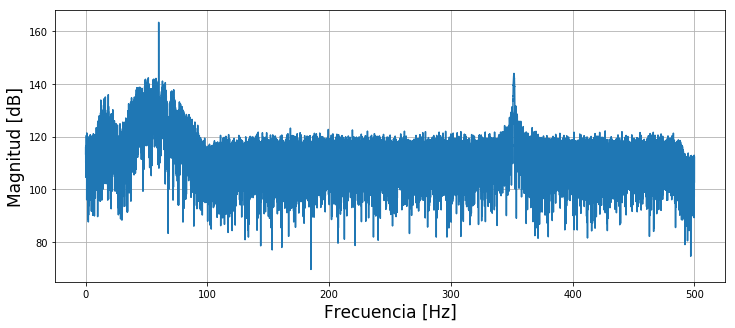

In [9]:
# FFT de la señal contaminada 

h,w = fou(PCG,sr)
plt.figure(figsize=(12,5))
plt.plot(w,h)
# plt.title('FFT de la señal contaminada',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)
plt.savefig(datapath+'images\\FFT_c.png')

In [10]:
# Diseño de filtro rechaza banda orden 2

n   = 2
fc  = 2*np.array( [58.0,62.0] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

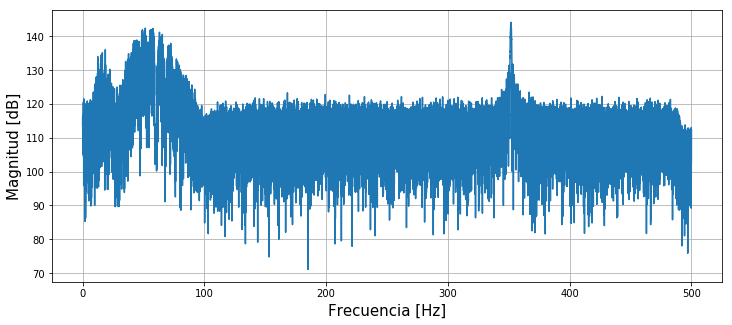

In [19]:
# Filtrado de la señal

PCG_2 = sg.lfilter(b,a,PCG)
PCG_2 = sg.lfilter(b,a,PCG_2[::-1])[::-1] #Implementación del filtro en fase cero

# FFT de señal filtrada 

h2,w2 = fou(PCG_2,sr)
plt.figure(figsize=(12,5))
plt.plot(w2,h2)
# plt.title('FFT de la señal filtrada con filtro n=2',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(datapath+'images\\FFT_RB2')

In [12]:
"""Audio de la señal filtrada"""
sd.play(PCG_2,sr)

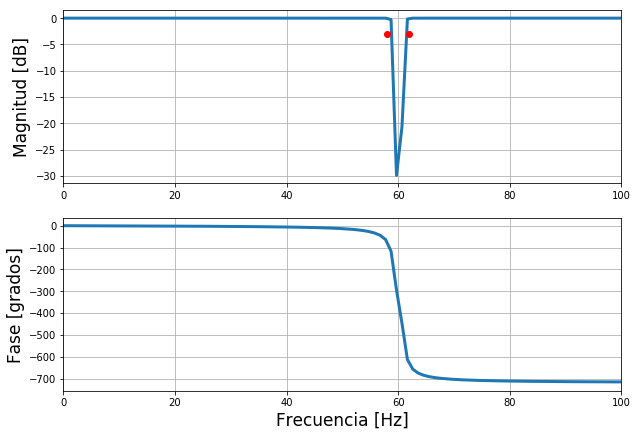

In [18]:
# Caracterización del filtro n=2

w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
# plt.title('Respuesta en frecuencia de filtro \nn=2',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Fase [grados]',fontsize=17)
plt.grid(True)
plt.savefig(datapath+'images\\RF_RB2')

In [14]:
"""Diseño de filtro orden 4"""

n   = 4
fc  = 2*np.array( [59.,61.] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

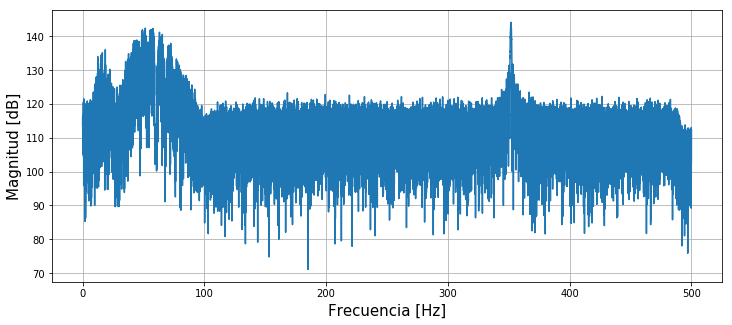

In [15]:
# Filtrado de la señal

PCG_4 = sg.lfilter(b,a,PCG)
PCG_4 = sg.lfilter(b,a,PCG_4[::-1])[::-1] #implementación del filtro en fase cero

# FFT de señal filtrada 

h4,w4 = fou(PCG_4,sr)
plt.figure(figsize=(12,5))
plt.plot(w4,h4)
# plt.title('FFT de la señal filtrada con filtro \nn=4',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(datapath+'images\\FFT_RB4')

In [16]:
"""Audio de señal filtrada"""
sd.play(PCG_4,sr)

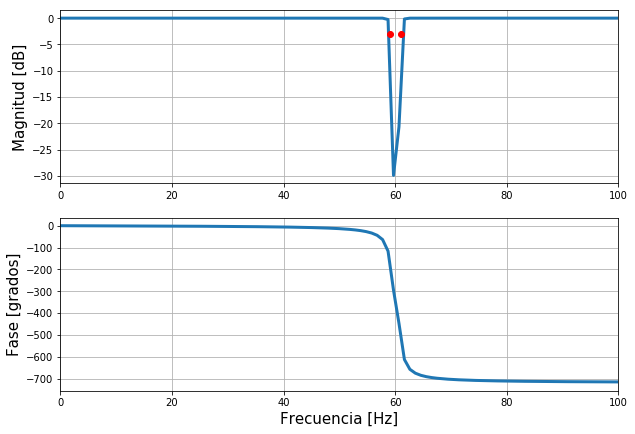

In [17]:
# Caracterización del filtro n=4

w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(59,-3,'ro')
fc2 = plt.plot(61,-3,'ro')
plt.xlim(0,100)
# plt.title('Respuesta en frecuencia del filtro \nn=4',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Fase [grados]',fontsize=15)
plt.grid(True)
plt.savefig(datapath+'images\\RF_RB4')